In [5]:
import matplotlib.pyplot as plt
import pandas
import peakutils
import numpy as np

SAMPLING_RATE = 100000
freq = np.array([i/1024*50000 for i in range(1024)])

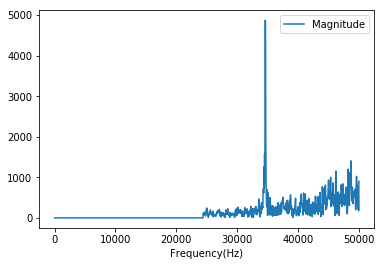

In [109]:
df = pandas.read_csv("./out.fft")
plt.figure(figsize=(13, 4), dpi=80)
df["Magnitude"][0:500] = 0
df[0:].plot(x="Frequency(Hz)", y="Magnitude")
#peaks = freq[peakutils.indexes(df["Magnitude"], thres=0.7)]
#print(peaks)